In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv("loan_train.csv")
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
test=pd.read_csv("loan_test.csv")
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [5]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
train.columns



Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
col=['LoanAmount','Loan_Amount_Term', 'Credit_History']
from sklearn.impute import SimpleImputer
sim=SimpleImputer(missing_values=np.nan,strategy='median')
for i in col:
    x=train[i]
    y=np.array(x).reshape(-1,1)
    train[i]=sim.fit_transform(y)

In [118]:
col2=['Gender', 'Married', 'Dependents','Self_Employed']
for i in col2:
    train[i]=train[i].fillna(value=0)



In [129]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [170]:
train["Dependents"]=train["Dependents"].replace('3+',3)

In [173]:
col3=['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']


In [174]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in col3:
    x=train[i].astype(str)
    
    train[i]=le.fit_transform(x)


In [175]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,16,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,139,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,262,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [176]:
train.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,0.075477,0.101695,0.023238,-0.022402,-0.049048,0.040688,0.072263,0.058030,-0.069640,-0.053702,-0.009570,-0.035261
Gender,0.075477,1.000000,0.336094,0.149674,0.024382,-0.025022,0.094472,0.073308,0.135505,-0.068522,-0.003844,-0.030903,0.008690
Married,0.101695,0.336094,1.000000,0.338689,0.006759,-0.038153,0.052119,0.069877,0.144297,-0.096368,0.014896,0.007973,0.096657
Dependents,0.023238,0.149674,0.338689,1.000000,0.060466,0.005622,0.103416,0.011146,0.128868,-0.075159,-0.082888,0.032600,-0.007318
Education,-0.022402,0.024382,0.006759,0.060466,1.000000,-0.021130,-0.140760,-0.062290,-0.168759,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.049048,-0.025022,-0.038153,0.005622,-0.021130,1.000000,0.095664,0.052218,0.089886,-0.036361,0.062019,-0.013439,0.010880
ApplicantIncome,0.040688,0.094472,0.052119,0.103416,-0.140760,0.095664,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.072263,0.073308,0.069877,0.011146,-0.062290,0.052218,-0.116605,1.000000,0.189218,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.058030,0.135505,0.144297,0.128868,-0.168759,0.089886,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.046632,-0.033214
Loan_Amount_Term,-0.069640,-0.068522,-0.096368,-0.075159,-0.073928,-0.036361,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.076120,-0.022549


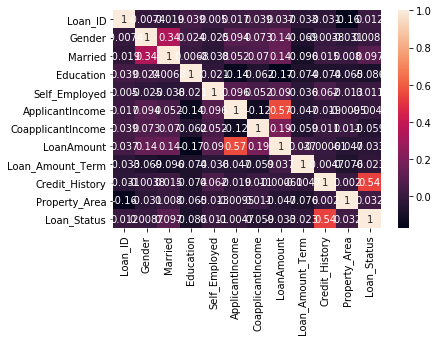

In [157]:

sns.heatmap(train.corr(),annot=True)
plt.show()

In [209]:
X=train[['Gender', 'Married', 'Dependents',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'Loan_Amount_Term',]]
X.iloc[0]

Gender                  1.0
Married                 0.0
Dependents              0.0
Self_Employed           0.0
ApplicantIncome      5849.0
CoapplicantIncome       0.0
Loan_Amount_Term      360.0
Name: 0, dtype: float64

In [182]:
y=train['LoanAmount']

In [239]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X,y)
    

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [240]:
lr.score(X,y)

0.4058331687078376

In [242]:
new=np.array([[1,0,0,0,5949,0,360]])
lr.predict(new)

array([128.88840979])

In [246]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=6)
x_poly=poly.fit_transform(X)
new_poly=poly.fit_transform(new)

In [249]:
from sklearn.linear_model import LinearRegression
lr1=LinearRegression()
lr1.fit(x_poly,y)
    

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [250]:
lr1.score(x_poly,y)

0.8505483476227339

In [253]:
prediction=lr1.predict(new_poly)
prediction

array([132.67736685])

In [255]:
lr.intercept_

29.977143532202845

In [256]:
lr1.intercept_

63.306076766935064

In [257]:
lr.coef_

array([7.12967540e+00, 1.40042484e+01, 2.98392681e+00, 4.38934265e+00,
       8.04904865e-03, 7.26525698e-03, 1.21938334e-01])

In [258]:
lr1.coef_

array([ 9.75064400e-16, -4.13551379e-17, -1.09459614e-18, ...,
        7.27922796e-15, -1.37377666e-14,  1.00614601e-15])